In [1]:
import operator as op
import math
import numpy as np
from itertools import combinations 

import networkx as nx
import matplotlib.pyplot as plt


In [2]:
N=100 #number of students
C=20 #number of classes
mu=15.0 #avg number of students per class
sd=5.0 #std dev of students per class

A1=np.zeros((N,N)) #adjacency matrix

In [3]:
floorfunc=np.vectorize(math.floor)
Cn=floorfunc(np.random.normal(mu,sd,size=(C,1))) #sampling class size N(15,5^2),capped at N
#print(Cn)

In [12]:
for i in range(C): #loop through each class
    currentS=np.random.choice(N,size=(int(Cn[i]),1),replace=False)
    #random sample from students to decide which students are in current class
    currentA=combinations(currentS,2) #find all connections to be filled in adjacency matrix
    for j in list(currentA):
        A1[j[0],j[1]]=1
        A1[j[1],j[0]]=1
    

In [13]:
print(A1)

print(sum(A1))

#check for symmetry
print(sum(sum(np.transpose(A1)-A1)))

[[0. 0. 1. ... 1. 1. 0.]
 [0. 0. 1. ... 1. 1. 1.]
 [1. 1. 0. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 0. 0. 1.]
 [1. 1. 1. ... 0. 0. 1.]
 [0. 1. 1. ... 1. 1. 0.]]
[50. 72. 76. 46. 65. 64. 37. 75. 65. 35. 40. 73. 80. 70. 77. 42. 76. 63.
 53. 60. 58. 85. 73. 69. 68. 75. 39. 59. 32. 44. 68. 68. 59. 62. 79. 66.
 63. 83. 64. 75. 73. 74. 60. 80. 75. 77. 82. 60. 82. 59. 83. 66. 42. 86.
 60. 63. 71. 76. 36. 83. 61. 56. 69. 52. 55. 41. 64. 80. 49. 75. 64. 75.
 63. 65. 34. 68. 88. 69. 60. 68. 84. 48. 74. 81. 54. 78. 89. 76. 83. 76.
 72. 69. 50. 87. 58. 64. 71. 60. 71. 71.]
0.0


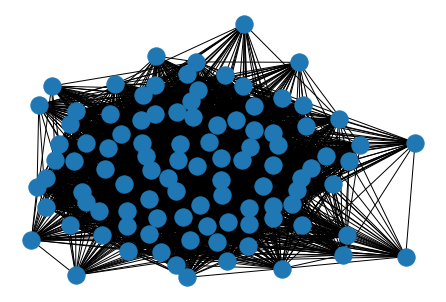

In [14]:
#plot A1
G1=nx.Graph()
G1.add_nodes_from([i for i in range(N)])
#nx.draw(G)
for i in range(N): 
    for j in range(i, N):
        if A1[i,j]==1:
            G1.add_edge(i,j)
        else: continue

nx.draw(G1)

Following is the second method, where we have a number of majors and students, as well as courses, are allocated across majors. Therefore, this method should have clusters that are more concentrated while still connected.

In [7]:
M=4 #number of majors. Here in second method, we incorporate the ideas of having majors 
#and different students have priority taking their major core courses
plug=0.1
mp=np.append(np.repeat((1-plug)/(M-1),M-1),plug) #probability vector for each student to be one of the four major
MS=np.random.multinomial(N,mp) #number of studetns randomly allocated to the M majors
cumMS=np.cumsum(MS)
cumMS=np.insert(cumMS,0,0)

print(MS)
print(cumMS)


A2=np.zeros((N,N))

[18 31 36 15]
[  0  18  49  85 100]


In [8]:
CS=np.random.multinomial(C,mp); #number of classes opened by the M majors respectively
cumCS=np.cumsum(CS)
cumCS=np.insert(cumCS,0,0)

print(CS)
print(cumCS)

[3 8 6 3]
[ 0  3 11 17 20]


In [9]:
minfunc=np.vectorize(min)
for i in range(C): #loop through each class
    for j in range(M):
        currentOutMajorPopulation=np.delete(range(N),range(cumMS[j],cumMS[j+1]))
        #print(currentOutMajorPopulation)
        if i<cumCS[j+1] and i>=cumCS[j]:
            inMajorS=minfunc(int(Cn[i]*0.8),MS[j]) #assume 80% are in-major students, 
                                                     #but capped at the max possible students taking this major
            outMajorS=Cn[i]-inMajorS
            #print(inMajorS)
            #print(outMajorS)
            currentInMajorS=cumMS[j]+np.random.choice(MS[j],size=(inMajorS,1),replace=False)
            currentOutMajorS=np.random.choice(currentOutMajorPopulation,size=(outMajorS[0],1),replace=False)
            #print(currentInMajorS)
            #print(currentOutMajorS)
            
        currentS=np.append(currentInMajorS,currentOutMajorS);
        currentA=combinations(currentS,2) #find all connections to be filled in adjacency matrix
        for k in list(currentA):
            A2[k[0],k[1]]=1
            A2[k[1],k[0]]=1

In [10]:
print(A2)

print(sum(A2))

#check for symmetry
print(sum(sum(np.transpose(A2)-A2)))

[[0. 1. 1. ... 0. 0. 0.]
 [1. 0. 1. ... 1. 1. 1.]
 [1. 1. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 1. 1.]
 [0. 1. 0. ... 1. 0. 1.]
 [0. 1. 0. ... 1. 1. 0.]]
[52. 64. 31. 25. 20. 23. 49. 20. 45. 25. 42. 50. 56. 33. 35. 12. 27. 20.
 35. 19. 44. 39. 41. 27. 50. 65. 51. 28. 39. 44. 26. 26. 17. 52. 31. 32.
 26. 48. 56. 34. 35. 48. 46. 23. 51. 63. 57. 11. 34. 18. 42. 47. 59. 11.
 41. 29. 38. 19. 68. 31. 49. 31. 51. 38. 37. 36. 34. 58. 41. 49. 28. 54.
 11. 49. 29. 29. 51. 30. 41. 50. 29. 43. 54. 25. 41. 47. 43. 31. 31. 50.
 43. 47. 31. 40. 31. 31. 31. 46. 31. 31.]
0.0


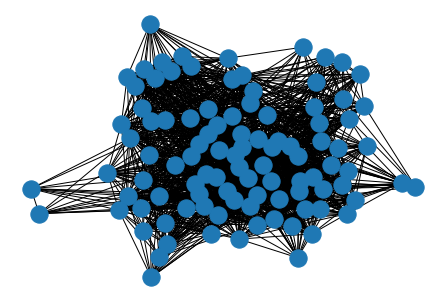

In [11]:
#plot A2
G2=nx.Graph()
G2.add_nodes_from([i for i in range(N)])
#nx.draw(G)
for i in range(N):
    for j in range(i, N):
        if A2[i,j]==1:
            G2.add_edge(i,j)
        else: continue

nx.draw(G2)

In [23]:
#plot A2, but exclude those are not connected to the rest of graph,
excludeNode2=sum(A2)==0
nodeLeft=sum(excludeNode2==False)
A2exclude=A2
A2exclude=np.delete(A2exclude,excludeNode2)
A2exclude=np.delete(A2exclude,excludeNode2,1)

G3=nx.Graph()
G3.add_nodes_from([i for i in range(nodeLeft)])
#nx.draw(G)
for i in range(nodeLeft):
    for j in range(i, nodeLeft):
        if A2exclude[i,j]==1:
            G3.add_edge(i,j)
        else: continue

nx.draw(G3)

[1. 1. 1. ... 1. 1. 0.]


/Users/Lucie_DongyanHuo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: in the future insert will treat boolean arrays and array-likes as boolean index instead of casting it to integer
  """


AxisError: axis 1 is out of bounds for array of dimension 1